## Testing

In [1]:
from keras.models import load_model
from keras.preprocessing import image

from matplotlib import pyplot as plt
import numpy as np

%matplotlib inline

Using TensorFlow backend.


In [2]:
IMAGE_SIZE = (128,128,3)

In [3]:
# function to load an image in suitable format for prediction

def load_image(path):
    img = image.load_img(path, target_size=IMAGE_SIZE[:2])
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = img/255
    return img

In [4]:
# function to show an image
# img is of shape (1, 128, 128, 3)
# to show an image, img[0] is extracted and shown with the help of pyplot

def show_image(img):
    plt.imshow(img[0])

**Load the face detection model**

In [5]:
model = load_model('mask_cnn.h5')

**Load an image and predict**

NOTE: Probability close to 1 indicates high probability of mask detection

[[0.9167152]]
Mask


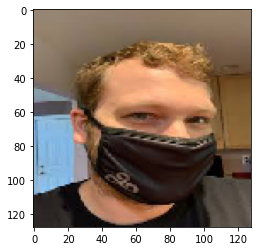

In [7]:
test_img = load_image('data/test/2_with_mask/with_mask_2734.jpg')
show_image(test_img)

prediction = model.predict(test_img)
print(prediction)

## if probability is atleast 60%, then accept it as wearing mask
if prediction[0][0] < .6:
    print("No Mask")
else:
    print("Mask")

---
### Demo with live webcam stream

WARNING: not suitable for low light conditions

In [9]:
import cv2 as cv

cap = cv.VideoCapture(0)

i = 0

ret, frame = cap.read()
if not ret:
        print("Couldn't open camera! Exiting...")
        cap.release()
        exit(0)

h, w = frame.shape[:2]
x1 = h*1//6
x2 = h*5//6
y1 = w*1//6
y2 = w*5//6

while True:
    
    ret, frame = cap.read()
    if not ret:
        print("Couldn't open camera! Exiting...")
        break
    
    frame = cv.flip(frame, 1)  # flip captured frame horizontally for mirror like effect
    
    test_img = frame[x1:x2][y1:y2]
    test_img = cv.resize(frame, (128,128), cv.INTER_AREA)
    test_img = cv.cvtColor(test_img, cv.COLOR_BGR2RGB)
    test_img = image.img_to_array(test_img)
    test_img = np.expand_dims(test_img, axis=0)
    test_img /= 255
    
    # refresh prediction value every 30 frames
    if i == 0: 
        prediction = model.predict(test_img)[0][0]
    i = (i+1)%30
    
    cv.rectangle(frame,(y1,x1),(y2,x2),(220,255,0),2)
    cv.putText(frame, str(prediction), (10,400), cv.FONT_HERSHEY_SIMPLEX, 1, (200,188,220), 2, cv.LINE_AA)
    cv.imshow('capture', frame)
    
    if cv.waitKey(30) & 0xFF == 27:
        break

cap.release()
cv.destroyAllWindows()

---